<a href="https://colab.research.google.com/github/jposyluzny/ENEL645/blob/main/Lectures/Week%202/DefiningFirstNeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fully Connected Neural Networks

This tutorial demonstrates the usage of fully connected nueral-networks to classify 2-dimensional synthetic data. We implement the network using Keras and TensorFlow. Keras and TensorFlow are powerful frameworks that allow you to build many deep-learning-based applications. <br>
The goals of this tutorial are:


*   Introduce Keras and TensorFlow to implement fully connected neural networks
*   Illustrate the non-linear decision rules that multi-layer neural networks can achieve.

# Importing Python Libraries

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
! ls gdrive/MyDrive/ENEL645-tutorial/ENEL645-master/

Figures     LICENSE  OUTLINE.txt  README.md
JNotebooks  Modules  PDFs	  Short-tutorials


In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.utils import to_categorical #Function to convert labels to onehot encoding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import SGD

import sys

# Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = 'gdrive/MyDrive/ENEL645-tutorial/ENEL645-master/Modules/'

if not MY_UTILS_PATH in sys.path:
  sys.path.append(MY_UTILS_PATH)

import dataset_utils

# Loading and Displaying a Synthetic 2D Dataset

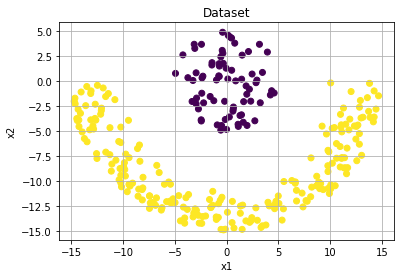

In [65]:
# Generating a synthetic dataset with four classes
nsamples = 300

# data = dataset_utils.corners(N = nsamples, scale=0.5, gapwidth = 3, cornerwidth=4) # linear dataset
data = dataset_utils.crescent_full_moon(N = nsamples, r1 = 5, r2 = 10, r3 = 15) # non-linear dataset

# Separating features (X) and labels (y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # features

# Number of classes
k = np.unique(Y).size

colors = np.array(['r', 'y', 'b', 'g'])

# Displaying the dataset
plt.scatter(X[:,0], X[:,1], c=Y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

# Train, Validation, and Test Sets Split

In [66]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

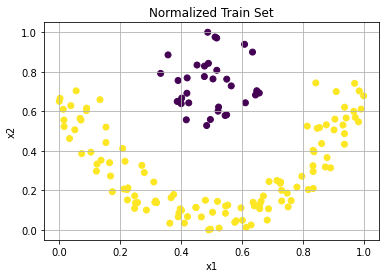

In [67]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True) # keepdims means keep dimensionality of original array
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

# Representing Labels using onehot encoding

In [68]:
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elements
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 1 1 1 1]

Y_oh_train[:5]=
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Define a Fully Connected Neural Network with Keras

In [76]:
def my_model(k, learning_rate = 0.15):
  inputs = Input(shape=(2,))
  l1 = Dense(10, activation='relu')(inputs) # relu = rectified layer units
  out1 = Dense(k, activation='softmax')(l1)
  model = Model(inputs=inputs, outputs = out1)
  sgd = SGD(lr=learning_rate)
  model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics = ["accuracy"])
  return model

In [77]:
model = my_model(k)
print(model.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


# Training the Model

In [91]:
batch_size = train_split
nb_epoch = 300
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data = (X_val, Y_oh_val),
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/300
1/1 [==============================] - 0s 96ms/step - loss: 0.0270 - accuracy: 0.9933 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 2/300
1/1 [==============================] - 0s 44ms/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 3/300
1/1 [==============================] - 0s 47ms/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 4/300
1/1 [==============================] - 0s 48ms/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 5/300
1/1 [==============================] - 0s 219ms/step - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 6/300
1/1 [==============================] - 0s 53ms/step - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 7/300
1/1 [==============================] - 0s 45ms/step - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 8/300
1/1 [==

# Printing Loss and Estimated Weights (Ws)

Final loss (cross-entropy and accuracy): [0.03598600998520851, 1.0]

Layer 0
Bias:
 [-3.8481034e-02 -4.1617846e-01  2.1071002e-01  0.0000000e+00
  1.7044107e+00  5.7992482e-01  2.1465890e-02 -5.9030799e-04
  0.0000000e+00 -2.8968263e-01]
W:
 [[-0.01422728  1.4150044   0.659004   -0.34276816 -3.2029316  -1.336981
   2.8189528   0.05042274 -0.0123657   1.0681473 ]
 [ 0.02864489 -0.50920105 -0.3642324  -0.17288399 -0.29080018  0.12765656
  -2.1971946   2.461316   -0.08666843 -0.4305349 ]]

Layer 1
Bias:
 [-0.51436627  0.5143662 ]
W:
 [[ 0.6345243  -0.43508387]
 [-0.58313954  1.6034213 ]
 [-0.3226513   0.385413  ]
 [ 0.5174493   0.48486632]
 [-2.65807     2.4580073 ]
 [-1.1392941   0.8469872 ]
 [-2.4865856   2.513702  ]
 [ 1.9308498  -1.4555519 ]
 [-0.37314475 -0.55985075]
 [-0.57953465  0.9871779 ]]



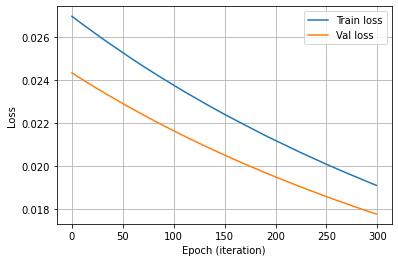

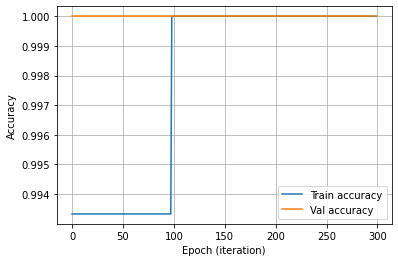

In [92]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Val accuracy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Classifier Decision Boundary

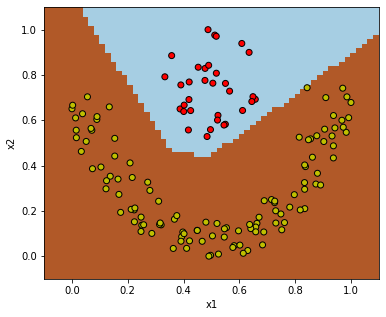

In [93]:
h = .02  # step size in the mesh
slack = 0.1
# Calculates the grid for the attribute space

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()